In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import color_palette
import numpy as np

191.0
['September', 'October', 'October', 'October', 'October', 'October', 'November', 'November', 'November', 'November', 'December', 'December', 'December', 'December', 'January', 'January', 'January', 'January']


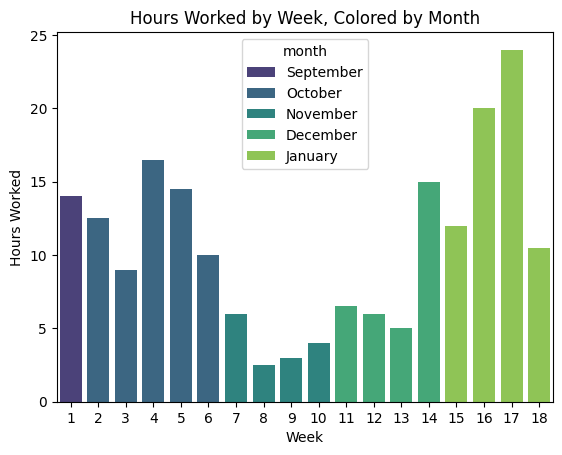

In [6]:
# Graph 1: Neel's working hours
# this plots my hours worked by month. was written by Bard!

weeks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
hours_worked = [14, 12.5, 9, 16.5, 14.5, 10, 6, 2.5, 3, 4, 6.5, 6, 5, 15, 12, 20, 24, 10.5]
#months = [9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11]
print(np.sum(hours_worked))
months = ["September"]
for i in range(5):
    months.append("October")
for i in range(4):
    months.append("November")
for i in range(4):
    months.append("December")
for i in range(4):
    months.append("January")
print(months)
# Create a dataframe from the data
df = pd.DataFrame({"week": weeks, "hours_worked": hours_worked, "month": months})
# Specify a logical color palette
palette = color_palette("viridis", len(df["month"].unique()))
# Create the bar chart
sns.barplot(x="week", y="hours_worked", hue="month", data=df, palette=palette)
plt.xlabel("Week")
plt.ylabel("Hours Worked")
plt.title("Hours Worked by Week, Colored by Month")
# Show the chart
plt.show()

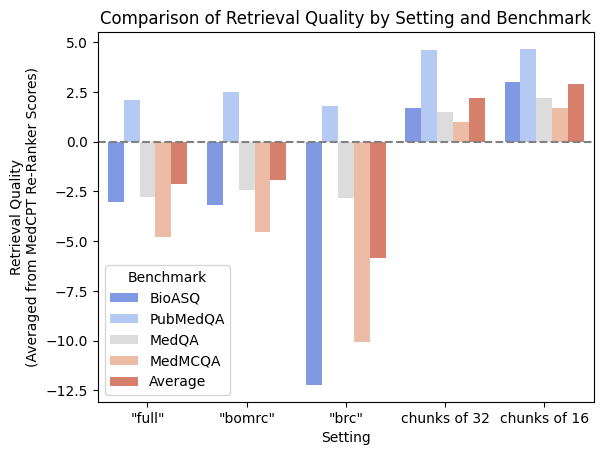

In [28]:
# Graph 2: Average retrieval quality on different retrieval settings (with all benchmarks)
#this plots the average retrieval quality of full, bomrc, brc, input_segmentation_32, input_segmentation_16
#data in this was collected on 09.01.24 by calling all 486 questions in BioASQ5b, and 500 questions in MedQA.
#for each of them, top 5 were retrieved and reranked with the MedCPT Re-Ranker. the top chunk and its score were noted
#at the end, the average of these scores was noted as "average retrieval quality"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mode = ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"]

# Define the dataframes
data1 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-3.0362098, -3.1872854, -12.228864, 1.7101222, 3.02405],
        'Benchmark': ["BioASQ"] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [2.1173124, 2.4807162, 1.7723576, 4.6062207, 4.6623235],
        'Benchmark': ["PubMedQA"] * 5}
df2 = pd.DataFrame(data2)

data3 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-2.7683034,-2.4228208,-2.8325806,1.5045198, 2.1952846],
        'Benchmark': ["MedQA"] * 5}
df3 = pd.DataFrame(data3)

data4 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-4.8010774,-4.523125, -10.081551, 1.0107652, 1.6785029],
        'Benchmark': ["MedMCQA"] * 5}
df4 = pd.DataFrame(data4)

# Combine the DataFrames
df = pd.concat([df1, df2, df3, df4])

# Calculate average retrieval quality per setting
avg_df = df.groupby('Setting')['Avg. retrieval quality'].mean().reset_index()

# Add a generic "Benchmark" column
avg_df['Benchmark'] = 'Average'

df = pd.concat([df, avg_df])

# Create a diverging color palette for positive and negative values
palette = sns.color_palette("coolwarm", n_colors=len(df['Benchmark'].unique()))

# Create the bar plot with Seaborn
sns.barplot(x="Setting", y="Avg. retrieval quality", hue="Benchmark", palette=palette, data=df)


# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a title and labels
plt.title("Comparison of Retrieval Quality by Setting and Benchmark")
plt.xlabel("Setting")
plt.ylabel("Retrieval Quality\n(Averaged from MedCPT Re-Ranker Scores)")

# Add a horizontal line at zero for visual clarity
plt.axhline(0, color='gray', linestyle='--')

# Show the plot
plt.show()

/tmp/ipykernel_768463/1359863046.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


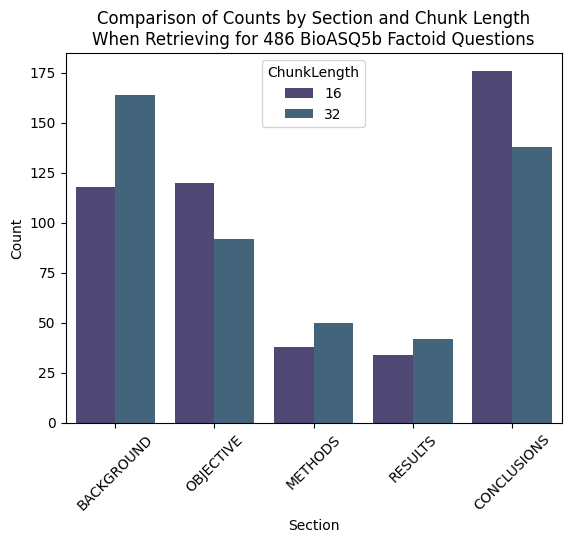

In [4]:
# Graph 3: Where do we retrieve from when considering bioASQ questions?
# this plots the distribution of chunks over sections on BioASQ5b chunk_length=16 and 32
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [164, 92, 50, 42, 138],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [118, 120, 38, 34, 176],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)

# Combine the DataFrames
df = pd.concat([df1, df2])

# Create a custom color palette with adjusted saturation
palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed

# Create the bar plot with Seaborn
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 486 BioASQ5b Factoid Questions")
plt.xlabel("Section")
plt.ylabel("Count")

# Show the plot
plt.show()

/tmp/ipykernel_768463/2243239763.py:23: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


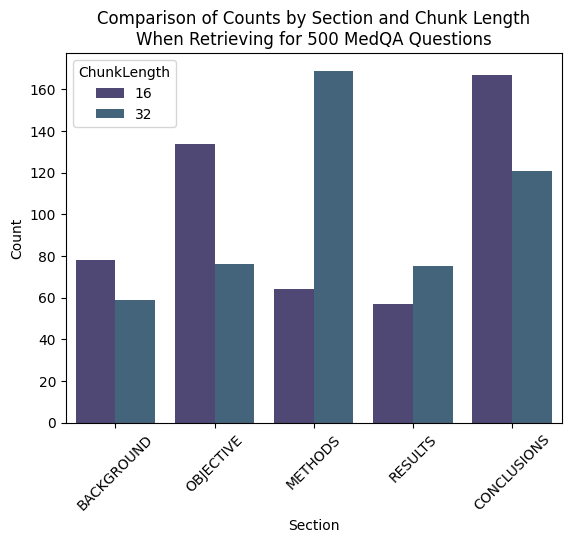

In [5]:
# Graph 4: Where do we retrieve from when considering MedQA questions?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [59, 76, 169, 75, 121],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [78, 134, 64, 57, 167],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)

# Combine the DataFrames
df = pd.concat([df1, df2])

# Create a custom color palette with adjusted saturation
palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed

# Create the bar plot with Seaborn
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 500 MedQA Questions")
plt.xlabel("Section")
plt.ylabel("Count")

# Show the plot
plt.show()